# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

Upload data_Nis_school2024.zip nd then run the following cell to unzip it.

In [ ]:
from zipfile import ZipFile

file_name = "/content/data_Nis_school2024.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2024-06-24 13:49:59 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [2]:
import Pkg;
Pkg.add("DCAUtils")
Pkg.add("PyPlot")
Pkg.add("StatsBase")
Pkg.add("JLD2")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed FastaIO ── v1.0.2
   Installed GZip ───── v0.5.2
   Installed DCAUtils ─ v1.0.1
    Updating `~/.julia/environments/v1.8/Project.toml`
  [e41cd558] + DCAUtils v1.0.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [e41cd558] + DCAUtils v1.0.1
  [a0c94c4b] + FastaIO v1.0.2
⌅ [92fee26a] + GZip v0.5.2
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ GZip
  ✓ FastaIO
  ✓ DCAUtils
  3 dependencies successfully precompiled in 2 seconds. 20 already precompiled.
   Resolving package versions...
   Installed FixedPointNumbers ─ v0.8.5
   Installed LaTeXStrings ────── v1.3.1
   Installed Reexport ────────── v1.2.2
   Installed MacroTools ──────── v0.5.13
   Installed ColorTypes ──────── v0.11.5
   Installed Colors ──────────── v0.12.11
   Inst

In [3]:
using DCAUtils
using PyPlot
using LinearAlgebra
using Statistics
using StatsBase
using JLD2

In [4]:
@load "data_Nis_school2024.jld2"

5-element Vector{Symbol}:
 :Z
 :h
 :J
 :step_matrices
 :step_matrices_prof

In [5]:
idxs = [i^3 for i in 1:20]; steps = [50*i for i in idxs];

## NATURAL MSA DATA
The training data is a **protein family** $\left\{a^m_i\right\}$ (with $m=1,...,M$ and $i=1,...,N$) of $M$ sequences of length $N$ that perform the **same function** and have a similar structure since they share a common ancestor.

In [6]:
println("# of natural sequences : $(size(Z,2))")
println("Length of each sequence : $(size(Z,1))")
println("Example of 10 sequences : ")
Z[:,1:10]

# of natural sequences : 24944
Length of each sequence : 76
Example of 10 sequences : 


76×10 Matrix{Int8}:
  2   2   2   2   2   2   2   2   2   2
 18  18   4   4   4  15   1   1  18  14
  6   6   8   8   8  18  18  18  18  18
  2   2   2   2   2   2   2   2   2   2
  6   6   4   4   4   6   6   6   4  16
 16  16  16  16  16   3   3   3   3   3
  4   4  17  17  17   6  20  13  13   9
 16  16   1   1   1  12  13  16  15   1
 16  16  15  15  15   1   1  17   6  16
 15  15  16  16  16   9   9   6  16   6
 18  18  18  18  18  17   8   8   8   5
  7   7   7   7   7   7   7   7   7   7
 20  20   5   5   5  20  20   5   5  20
  ⋮                   ⋮              
  6   6  15  15  15   6   6   6   6   6
 11  11  11  11  11  11  11  11  11  11
 12  12  16  16  16   3  12   3   3  16
 13  13  15  15  15  13  13  18  13  15
  9   9   4   4   4   9   3  20   6   3
  7   7  10  10  10   1   5  16  16   1
 18  18  18  18  18  18  18  18  18  18
 15  15  15  15  15  15  15  14  14  15
  4   4  16  16  16  13  13   2  10   5
  4   4  17  17  17   3   3  12   7   6
 15  15  15  15  15  1

Here we compute one-point and two-point aminoacid frequency od natural sequences

$$
f_i(a) = \frac{1}{M} \sum_m \delta_{a,a^m_i}
$$

$$
f_{ij}(a, b) = \frac{1}{M} \sum_m \delta_{a, a^m_i} \delta_{b, a^m_j}
$$

and the connected correlation

$$
C_{ij}(a,b) = f_{ij}(a, b) - f_i(a)f_j(b)
$$



In [16]:
f1_nat,f2_nat = compute_weighted_frequencies(Z, 22, 0.2);
f2_nat_conn = triu(f2_nat-f1_nat'.*f1_nat,21);

θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705


**Principal Component Analysis (PCA)** is a statistical technique used for dimensionality reduction. It transforms high-dimensional data into a set of orthogonal components (principal components) that explain the maximum variance in the dataset.

**How is PCA Done?**

1. **Data Preparation:**
   - PCA begins with a dataset represented as a matrix, where rows typically correspond to observations (sequences) and columns represent features (sequence positions/residues).
   - In the case of proteins the integer-encoded sequences we saw before are one-hot encoded (see explanation below)

2. **Eigenvalue Decomposition:**
   - Center the data
   - Compute the covariance matrix $$ \mathbf{C} = \frac{1}{n} \mathbf{X}^\top \mathbf{X} $$
   - Perform eigendecomposition to obtain eigenvalues and eigenvectors

   $$
\mathbf{C} \mathbf{v} = \lambda \mathbf{v} $$

  where $\lambda$ is an eigenvalue and $\mathbf{v}$ is the corresponding eigenvector.

3. **Principal Component Selection:**
   - Select the top principal components (PCs) based on eigenvalues, which indicate the amount of variance explained by each PC.
   - PCs capture the most significant patterns and variability in the dataset.They are simply the projection of data on the new basis.

     $$ \text{PC}_i = \mathbf{X} \mathbf{v}_i $$

   - We can also look at how much of the variance in the data is explained by a certain principal component $$
\text{Explained Variance of site i} = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}
$$


**Integer Encoding**

- **Original Representation:** Sequences are encoded with integers where each residue (e.g., A=1, B=2, ..., "-"=21) is represented numerically.

$$
\text{Sequence} = [1, 5, 3, 7, ..., 21]
$$

**One-Hot Encoding**

- **Concept:** Each residue is represented as a binary vector where only one bit is 'hot' (1), corresponding to its position.

$$
\text{A} = [1, 0, 0, ..., 0]
$$
$$
\text{B} = [0, 1, 0, ..., 0]
$$
$$
\text{"-"} = [0, 0, 0, ..., 1]
$$

**Why One-Hot Encoding is better?**


- **Equal Representation:** One-hot encoding represents each residue equally as a binary vector (all zeros except for a one at the position corresponding to the residue).
- **Preserves Categorical Nature:** PCA assumes linear relationships between variables, which one-hot encoding respects better than integer encoding.
- **Interpretability:** One-hot encoding maintains the categorical nature of sequence data, ensuring PCA accurately captures and interprets variance among different residue types.

In contrast, integer encoding may introduce unintended ordinal relationships, aminoacid "1" is more distant from aminoacid "20" than from aminoacid "3", potentially biasing PCA results.

By employing one-hot encoding, aminoacids are equally distant from each other.


In [7]:
"""
One-hot encodes a single sequence.

## Arguments
- `seq::Array{Int8,1}`: Integer array representing a sequence.
- `N::Int`: Length of the sequence.

## Returns
- `new_seq::Array{Float64,1}`: One-hot encoded sequence represented as a flattened binary vector.
"""
function one_hot(seq::Array{Int8,1}, N::Int)
    new_seq = zeros(N * 21)
    for j in 1:N
        index = seq[j]
        new_seq[(j-1) * 21 + index] = 1
    end
    return new_seq
end


"""
One-hot encodes a multiple sequence alignment (MSA).

## Arguments
- `msa::Array{Int8,2}`: Matrix where rows are sequences and columns are positions.

## Returns
- `new_msa::Array{Float64,2}`: One-hot encoded MSA where each sequence is transformed into a flattened binary vector.
"""
function one_hot(msa::Array{Int8,2})
    M, N = size(msa)
    new_msa = zeros(M, N * 21)
    for m in 1:M
        new_msa[m, :] .= one_hot(msa[m, :], N)
    end
    return new_msa
end


"""
Compute PCA on a multiple sequence alignment (MSA) and return explained variances and projection matrix.

## Arguments
- `msa::Array{Int8,2}`: MSA matrix where rows are sequences and columns are positions.

## Returns
- `expl_var::Array{Float64,1}`: Explained variances of the principal components.
- `eigenvecs_nat::Array{T,2}`: Eigenvectors of the covariance matrix.

## Note
- `T` is the type of elements in `msa`.
"""
function get_PCA(msa::Array{T,2}) where {T}
    W_nat = compute_weights(Z, 0.2)[1]

    # Compute covariance of data
    cov_nat = cov(Z1hot, pweights(W_nat))

    # Compute eigenvalues and eigenvectors of covariance matrix
    eigenvecs_nat = eigvecs(cov_nat)
    eigenvals_nat = eigvals(cov_nat)

    expl_var = [sum(eigenvals_nat[end-k:end] / sum(eigenvals_nat)) for k in 1:length(eigenvals_nat) - 1]

    return expl_var, eigenvecs_nat
end


"""
Project a multiple sequence alignment (MSA) onto principal components.

## Arguments
- `proj_matrix::Array{Float64,2}`: Projection matrix obtained from PCA.
- `msa::Array{T,2}`: MSA matrix where rows are sequences and columns are positions.

## Keyword Arguments
- `n_dim::Int=2`: Number of dimensions to project onto.

## Returns
- `Array{Float64,2}`: Projected MSA in reduced dimensions.
"""
function project_PCA(proj_matrix::Array{Float64,2}, msa::Array{T,2}; n_dim::Int=2) where {T}
    return proj_matrix[:, end:-1:end-n_dim]' * msa'
end ;


θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705


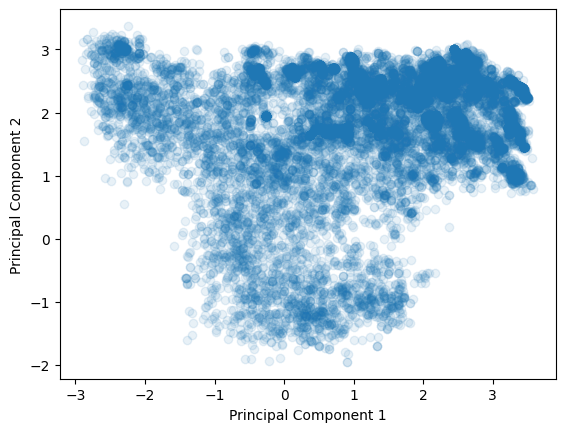

In [8]:
Z1hot = one_hot(Int8.(Z'));
expl_var, proj_matrix = get_PCA(Z1hot);
pc_nat = project_PCA(proj_matrix, Z1hot, n_dim = 2);

plt.scatter(pc_nat[1,:],pc_nat[2,:], alpha = 0.1, label = "natural")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
;

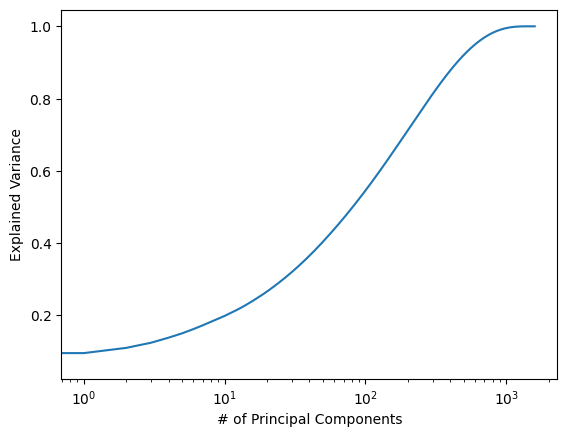

In [10]:
plt.plot(expl_var)
plt.xlabel("# of Principal Components")
plt.ylabel("Explained Variance");
plt.xscale("log")

To look more into our data we can compute **Pairwise Hamming Distance**.

**What is Hamming Distance?**

**Hamming distance** measures the number of positions at which corresponding symbols differ between two sequences of equal length.

- **Sequence Comparison:** Identifying evolutionary relationships, conserved regions, or mutations across sequences.
- **Clustering:** Grouping sequences based on similarity or divergence patterns.

Pairwise Hamming distance provides a straightforward method to quantify sequence dissimilarity in MSA data, facilitating various bioinformatics analyses and insights.


In [11]:
"""
Compute pairwise Hamming distances normalized by sequence length from a multiple sequence alignment (MSA).

## Input
- `msa`: Matrix of integers (Int8) representing a multiple sequence alignment,
where rows correspond to positions and columns correspond to sequences.

## Output
- `res`: Array of pairwise Hamming distances normalized by sequence length.

The function iterates over each pair of columns in `msa`,
calculates the Hamming distance (number of differing symbols)
between pairs of sequences, and normalizes the result by the sequence length (`L`).
The result is stored in `res`.

"""

function pairwise_hamming_distance(msa::Matrix{Int8})
    L,M = size(msa)
    res = []#zeros(M,M)
    for i in 1:M
        for j in (i+1):M
            push!(res, sum(msa[:,i] .!= msa[:,j]))
        end
    end
    return res ./L
end
;

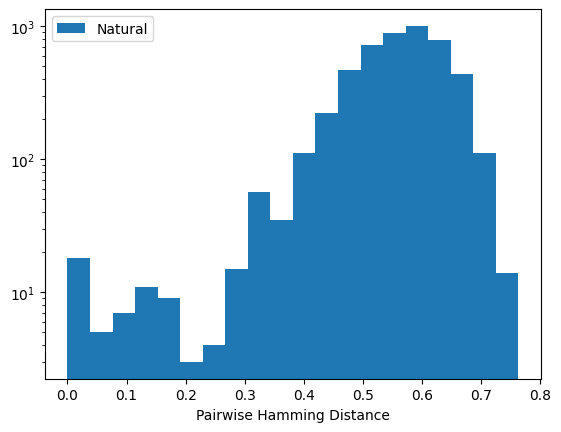

PyObject Text(0.5, 24.0, 'Pairwise Hamming Distance')

In [13]:
pair_d = pairwise_hamming_distance(Z[:, 1:100]);

plt.hist(pair_d, bins = 20, label = "Natural")
plt.legend()
plt.yscale("log")
plt.xlabel("Pairwise Hamming Distance")

## Direct Coupling Analysis

By applying the **Maximum Entropy Principle (MEP)**, we choose to reproduce data-set observables, one-point frequencies $f_i(a) = \frac{1}{M} \sum_m \delta_{a,a^m_i}$ and two-point frequencies $f_{ij}(b, c) = \frac{1}{M} \sum_m \delta_{b, a^m_i} \delta_{c, a^m_j}$. These act as constraints on the functional entropy maximization. The sequence energy takes the form of a **Potts model** :

$$
H(a_1, \ldots, a_N) = -\sum_i h_i(a_i) - \sum_{i<j} J_{ij}(a_i, a_j)
$$

Parameters are learned by gradient ascent, with model mean estimated through Markov Chain Monte Carlo:

$$
\begin{array}{cc}
    h_i(a) \leftarrow h_i(a)+ \epsilon (f_i(a)-<\delta_{a,a_i}>_{P}) \\ \\
    J_{ij}(a,b) \leftarrow J_{ij}(a,b)+\epsilon (f_{ij}(a,b)-<\delta_{a,a_i}\delta_{b,a_j}>_{P})
\end{array}   
$$


## GENERATIVITY of Potts Model

Once the parameters are inferred, we can sample the distribution until we recover the statistics. By using the learned parameters, we can generate new sequences that follow the same statistical properties as the original training data. This involves simulating the system using the Potts model energy function:

$$
H(a_1, \ldots, a_N) = -\sum_i h_i(a_i) - \sum_{i<j} J_{ij}(a_i, a_j)
$$

By performing Markov Chain Monte Carlo (MCMC) sampling, we can generate sequences that adhere to the one-point and two-point frequency constraints:

$$
f_i(a) = \frac{1}{M} \sum_m \delta_{a,a^m_i}
$$

$$
f_{ij}(b, c) = \frac{1}{M} \sum_m \delta_{b, a^m_i} \delta_{c, a^m_j}
$$

The generated sequences should recover the empirical statistics of the training data, ensuring that the inferred parameters accurately capture the underlying distribution of the protein family. This process allows us to validate the model and its ability to replicate the observed data characteristics.


Here we start 100 Markov Chains in the same sequence, and we see how are the evolved libraries at 20 different times of the sampling procedure, then we compare the model one and two-point frequencies with the empirical frequencies through a Pearson correlation coefficient.

In [14]:
"""
Perform frequency analysis on a list of step matrices.

## Input
- `step_matrices`: Array of step matrices (each matrix should be transposed with `Int8` elements).
- `f1_nat`: Natural frequency vector for the first feature.
- `f2_nat`: Natural frequency vector for the second feature.
- `f2_nat_conn`: Natural frequency connectivity matrix for the second feature.

## Output
- `cor1`: Array of Pearson correlation coefficients between `f1_nat` and each weighted frequency vector `f1s`.
- `cor2`: Array of Pearson correlation coefficients between `f2_nat` and each flattened weighted frequency vector `f2s`.
- `cor_conn`: Array of Pearson correlation coefficients between `f2_nat_conn` and each flattened weighted frequency connectivity matrix `f2s_conn`.

Each `step_matrices[i]` is transposed (`.′`) and used to compute weighted frequencies `f1` and `f2`.
`f1s`, `f2s`, and `f2s_conn` store these computed frequencies for correlation analysis.

The function returns arrays `cor1`, `cor2`, and `cor_conn` containing the correlations between the natural frequencies/connectivity and the computed weighted frequencies/connectivity matrices.
"""

function frequency_analysis(step_matrices, f1_nat, f2_nat, f2_nat_conn)
    f1s = []; f2s = []; f2s_conn = [];

    for i in 1:length(step_matrices)
        f1,f2 = DCAUtils.compute_weighted_frequencies(Int8.(step_matrices[i]'), 22, 0.);
        push!(f1s, f1)
        push!(f2s, f2)
        push!(f2s_conn, triu(f2 .- f1' .* f1, 21))
    end

    cor1 = [cor(f1_nat,x) for x in f1s];
    cor2 = [cor(f2_nat[:],x[:]) for x in f2s];
    cor_conn = [cor(f2_nat_conn[:], x[:]) for x in f2s_conn];

    return cor1, cor2, cor_conn
end
;

In [17]:
cor1, cor2, cor_conn = frequency_analysis(step_matrices, f1_nat, f2_nat, f2_nat_conn);

θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100
θ = 0.0 threshold = 0.0
M = 100 N = 76 Meff = 100


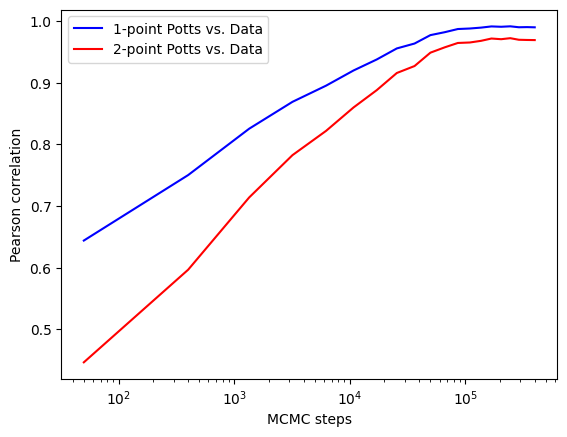

In [18]:
plt.plot(steps, cor1, color = "blue", label = "1-point Potts vs. Data")
plt.plot(steps, cor2, color = "red", label = "2-point Potts vs. Data")
plt.xlabel("MCMC steps")
plt.ylabel("Pearson correlation")
plt.legend()
plt.xscale("log")

## GENERATIVITY of Profile Model

The most elementary model for proteins is the profile model, including only the local fields, which can be computed directly from the one-point data frequencies. The profile model assumes that the probability distribution function (pdf) of a sequence is factorized among sites, meaning each site contributes independently to the overall probability.

Given the one-point frequencies:

$$
f_i(a) = \frac{1}{M} \sum_m \delta_{a, a^m_i}
$$

we can calculate the fields as follows:

$$
h_i(a) = \log f_i(a)
$$

This simplifies the model because we no longer need to consider the interactions between different sites. The sequence energy for a profile model is then given by:

$$
H(a_1, \ldots, a_N) = -\sum_i h_i(a_i)
$$

Once the fields are computed, we can sample the distribution by generating new sequences. Since the sites are independent the probability of a sequence is factorized and given by:

$$
P(\mathbf{a}) = \prod_i P(a_i)
$$

where

$$
P(a_i) = \frac{\exp(h_i(a_i))}{\sum_{a'} \exp(h_i(a'))}
$$

We can first check that profile model fields are quit close to the ones of Potts Model.

In [27]:
pc = 1e-4
h_prof = log.(reshape((1-pc) .* f1_nat .+ (pc/21), 21,size(Z,1)));
idxs = [i^3 for i in 1:20]; steps = [i*50 for i in idxs];

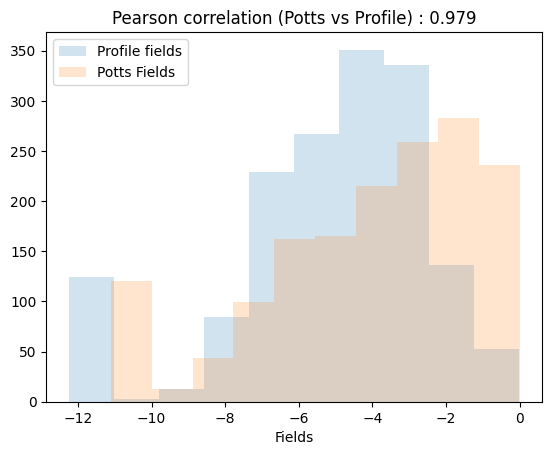

In [28]:
plt.hist(h_prof[:], alpha = 0.2, label = "Profile fields")
plt.hist(h[:], alpha = 0.2, label = "Potts Fields")
plt.xlabel("Fields")
plt.legend()
plt.title("Pearson correlation (Potts vs Profile) : $(round(cor(h[:], h_prof[:]), digits = 3))");


Using this approach, we can generate new sequences by sampling each site $i$ independently according to $P(a_i)$. These generated sequences should replicate the one-point frequencies, but should not capture the fact that different sites are interacting in a protein sequence.

To check if this is true we can repeat the analysis we already made with Potts model data.

Here we take multiple sequence alignments of our simulated trajectories at different times of the sampling procedure and we compare the model one and two-point frequences with the empirical frequencies through a Pearson correlation coefficient.

In [22]:
cor1_prof, cor2_prof, cor_conn_prof = frequency_analysis(step_matrices_prof, f1_nat, f2_nat, f2_nat_conn);

θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102
θ = 0.0 threshold = 0.0
M = 102 N = 76 Meff = 102


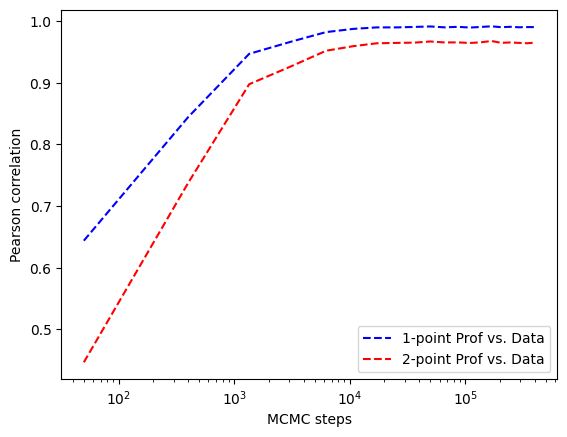

In [23]:
plt.plot(steps, cor1_prof, color = "blue", linestyle = "--", label = "1-point Prof vs. Data")
plt.plot(steps, cor2_prof, color = "red", linestyle = "--", label = "2-point Prof vs. Data")
plt.xscale("log")
plt.xlabel("MCMC steps")
plt.ylabel("Pearson correlation")
plt.legend()
;

Now let's compare the results between **Potts** and **Profile Models**:

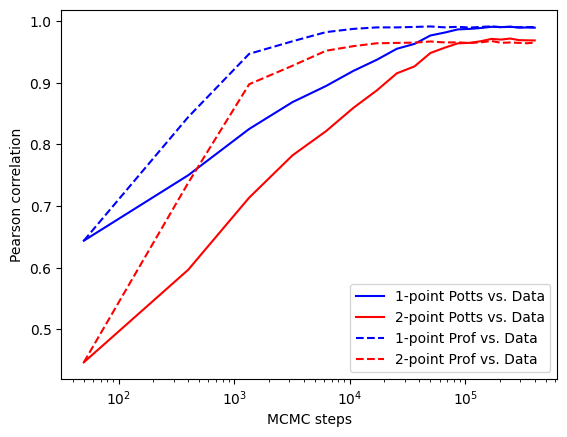

In [24]:
plt.plot(steps, cor1, color = "blue", label = "1-point Potts vs. Data")
plt.plot(steps, cor2, color = "red", label = "2-point Potts vs. Data")

plt.plot(steps, cor1_prof, color = "blue", linestyle = "--", label = "1-point Prof vs. Data")
plt.plot(steps, cor2_prof, color = "red", linestyle = "--", label = "2-point Prof vs. Data")

plt.xlabel("MCMC steps")
plt.ylabel("Pearson correlation")
plt.legend()
plt.xscale("log")

## Question

We see that the two models have the same performance, but then how can we show that the Potts model is
extracting more information from the data with respect to the profile model?

## Possible answers

- compute **Pairwise hamming distance** of the simulated sequences at end of Monte Carlo -> **not working**

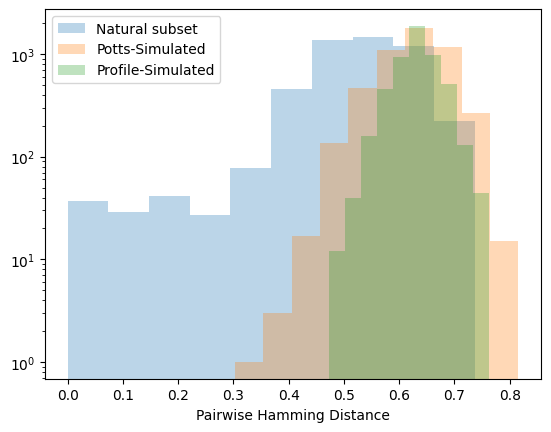

In [ ]:
pair_d_sim = pairwise_hamming_distance(Int8.(step_matrices[end]'));
pair_d_sim_prof = pairwise_hamming_distance(Int8.(step_matrices_prof[end]'));
sub_pair_d = pairwise_hamming_distance(Z[:, rand(1:size(Z,2), 100)]);

plt.hist(sub_pair_d, bins = 10, alpha = 0.3, label = "Natural subset")
plt.hist(pair_d_sim, bins = 10, alpha = 0.3, label = "Potts-Simulated")
plt.hist(pair_d_sim_prof, bins = 10, alpha = 0.3, label = "Profile-Simulated")
plt.legend()
plt.yscale("log")
plt.xlabel("Pairwise Hamming Distance")
;


- compute **Hamming distance from the starting sequence** of MCMC chains as a fuction of MCMC steps -> **not working**

θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705


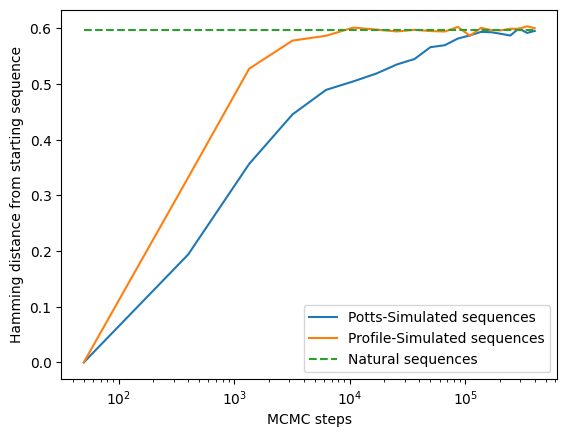

In [25]:
W = compute_weights(Z,22,0.2)[1]
dist_wt_nat = mean([sum(step_matrices[1][1,:] .!= Z[:,i]) for i in 1:size(Z,2)]./size(Z,1), weights(W))
idxs = [i^3 for i in 1:20]; steps = [50*i for i in idxs];

dist_wt_sim = [mean([sum(step_matrices[1][1,:] .!= step_matrices[n][i,:])
    for i in 1:size(step_matrices[1],1)]./size(Z,1)) for n in 1:length(idxs)];

dist_wt_sim_prof = [mean([sum(step_matrices_prof[1][1,:] .!= step_matrices_prof[n][i,:])
    for i in 1:size(step_matrices[1],1)]./size(Z,1)) for n in 1:length(idxs)];

plt.plot(steps, dist_wt_sim, label = "Potts-Simulated sequences")
plt.plot(steps, dist_wt_sim_prof, label = "Profile-Simulated sequences")
plt.plot([minimum(steps),maximum(steps)], [dist_wt_nat,dist_wt_nat], linestyle = "--", label = "Natural sequences")
plt.xscale("log")
plt.xlabel("MCMC steps")
plt.ylabel("Hamming distance from starting sequence")
plt.legend()
;

In [ ]:
#plt.plot(steps, cor1, color = "blue", label = "1-point Potts vs. Data")
#plt.plot(steps, cor2, color = "red", label = "2-point Potts vs. Data")
plt.plot(steps, cor_conn, color = "green", label = "Connected correlation Potts vs. Data")

#plt.plot(steps, cor1_prof, color = "blue", linestyle = "--", label = "1-point Prof vs. Data")
#plt.plot(steps, cor2_prof, color = "red", linestyle = "--", label = "2-point Prof vs. Data")
plt.plot(steps, cor_conn_prof, color = "green", linestyle = "--", label = "Connected correlation Prof vs. Data")

plt.xlabel("MCMC steps")
plt.ylabel("Pearson correlation")
plt.legend()
plt.xscale("log")

- compute **Connected Correlation** of simulated vs natural frequencies as a function of MCMC steps -> **OK!**

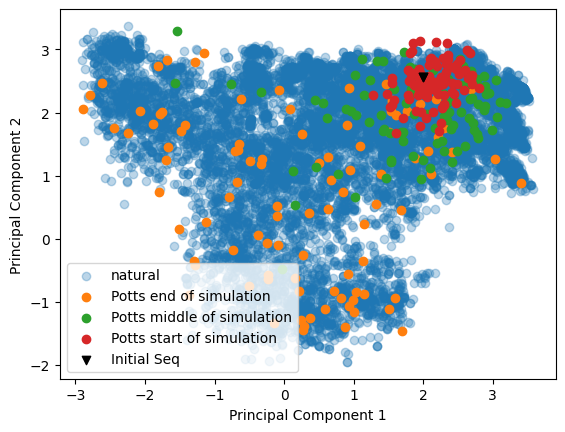

In [26]:
pc_sim_start = project_PCA(proj_matrix, one_hot(step_matrices[2]); n_dim = 2)
pc_sim_middle = project_PCA(proj_matrix, one_hot(step_matrices[6]); n_dim = 2)
pc_sim_end = project_PCA(proj_matrix, one_hot(step_matrices[end]); n_dim = 2)
pc_sim_wt = project_PCA(proj_matrix, one_hot(step_matrices[1][1:2,:]); n_dim = 2)

plt.scatter(pc_nat[1,:],pc_nat[2,:], alpha = 0.3, label = "natural")
plt.scatter(pc_sim_end[1,:],pc_sim_end[2,:], alpha = 1., label = "Potts end of simulation")
plt.scatter(pc_sim_middle[1,:],pc_sim_middle[2,:], alpha = 1., label = "Potts middle of simulation")
plt.scatter(pc_sim_start[1,:],pc_sim_start[2,:], alpha = 1., label = "Potts start of simulation")
plt.scatter(pc_sim_wt[1,:],pc_sim_wt[2,:], color = "black", marker = "v", label = "Initial Seq")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
;

- compare **Principal components** of Natural vs. Potts-simulated and Natural vs. Profile-simulated -> **OK!**

In [ ]:
pc_sim_start_prof = project_PCA(proj_matrix, one_hot(step_matrices_prof[2]); n_dim = 2)
pc_sim_middle_prof = project_PCA(proj_matrix, one_hot(step_matrices_prof[6]); n_dim = 2)
pc_sim_end_prof = project_PCA(proj_matrix, one_hot(step_matrices_prof[end]); n_dim = 2)

plt.scatter(pc_nat[1,:],pc_nat[2,:], alpha = 0.3, label = "natural")
plt.scatter(pc_sim_end_prof[1,:],pc_sim_end_prof[2,:], alpha = 1., label = "Prof end of simulation")
plt.scatter(pc_sim_middle_prof[1,:],pc_sim_middle_prof[2,:], alpha = 1., label = "Prof middle of simulation")
plt.scatter(pc_sim_start_prof[1,:],pc_sim_start_prof[2,:], alpha = 1., label = "Prof start of simulation")
plt.scatter(pc_sim_wt[1,:],pc_sim_wt[2,:], color = "black", marker = "v", label = "Initial Seq")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
;

## Bonus Track

**Why does the $Pearson(C_{ij}^{data}(a,b), C_{ij}^{Potts}(a,b))$ frequencies not saturate up to 1?**

## Answer

Consider that we have $10^5$ natural sequences whereas the simulated sequences are around $10^2$. It's not assured that with just a few sequences you are able to really sample the model frequencies and even some fine-scale quantities like the connected correlation.

To check if our model working well we can

1) **Simulate 10^5 sequences** with MCMC, compute again $C_{ij}^{Potts}(a,b)$ and see if **$Pearson(C_{ij}^{data}(a,b), C_{ij}^{Potts}(a,b))$** raises up

2) Estimate what is the **data autocorrelation** given a certain sample size: namely, it means computing **$Pearson(C_{ij}^{data, full}(a,b), C_{ij}^{data, subsample}(a,b))$**



In [ ]:
"""
Compute autocorrelation metrics from a subset of sequences within a multiple sequence alignment (MSA).

## Arguments
- `msa::Matrix{Int8}`: MSA matrix where rows represent positions and columns represent sequences.
- `N_seqs::Int`: Number of sequences randomly sampled from `msa` for each iteration.

## Returns
- Tuple containing autocorrelation metrics:
  - `cor1::Float64`: Mean Pearson correlation coefficient between weighted frequencies (`f1`) of sampled sequence subsets.
  - `err1::Float64`: Standard deviation of `cor1` values across iterations.
  - `cor2::Float64`: Mean Pearson correlation coefficient between flattened weighted frequencies (`f2`) of sampled sequence subsets.
  - `err2::Float64`: Standard deviation of `cor2` values across iterations.
  - `cor_conn::Float64`: Mean Pearson correlation coefficient between flattened connectivity matrices (`f_conn`) of sampled sequence subsets.
  - `err_conn::Float64`: Standard deviation of `cor_conn` values across iterations.

The function iterates multiple times (`i` iterations, default 5), each time randomly sampling `N_seqs` sequences from `msa`.
For each iteration, it computes weighted frequencies (`f1`, `f2`) and connectivity matrix (`f_conn`) using `compute_weighted_frequencies`
and calculates correlations between these metrics for sampled subsets. The resulting mean and standard deviation of correlations
across iterations are returned as a tuple.
"""

function autocorrelation(msa::Matrix{Int8}, N_seqs::Int)
    M = size(msa,2)
    res1 = []
    res2 = []
    res_conn = []
    #f1_tot, f2_tot = compute_weighted_frequencies(msa, 22, 0.2)
    #f_conn_tot = f2_tot .- f1_tot' .* f1_tot
    for i in 1:5
        f1,f2 = compute_weighted_frequencies(msa[:,rand(1:M, N_seqs)], 22, 0.2)
        f_conn = triu(f2 .- f1' .* f1, 21)
        _f1,_f2 = compute_weighted_frequencies(msa[:,rand(1:M, N_seqs)], 22, 0.2)
        _f_conn = triu(_f2 .- _f1' .* _f1, 21)
        push!(res1, cor(f1,_f1))
        push!(res2, cor(f2[:],_f2[:]))
        push!(res_conn, cor(f_conn[:],_f_conn[:]))
    end
    return (cor1 = mean(res1), err1 = std(res1),
        cor2 = mean(res2), err2 = std(res2),
        cor_conn = mean(res_conn), err_conn = std(res_conn))
end

@time res = autocorrelation(Z, 100);

In [ ]:
println("Data Autocorrelation with 100 sequences : $(round(res.cor_conn, digits = 3)) with error $(round(res.err_conn, digits = 3)) ")
println("Final Pearson among Data and Potts connected correlations : $(round(cor_conn[end], digits = 3))")

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />